In [40]:
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [41]:
df = py.read_csv("/home/rahmat/Desktop/ML_Projects/Regraction _model/tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [52]:
x1 = df['TV']
x1s=x1/np.max(x1)
x0 = np.ones(len(x1))
X = np.array([x0,x1s]).T
Y = df['Sales']
theta = np.ones(X.shape[1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


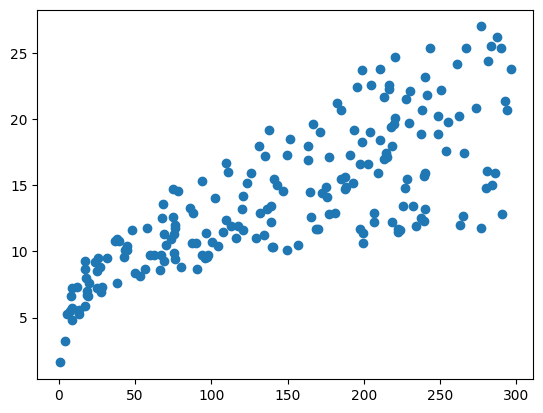

In [5]:
plt.scatter(df['TV'],Y)
plt.show()

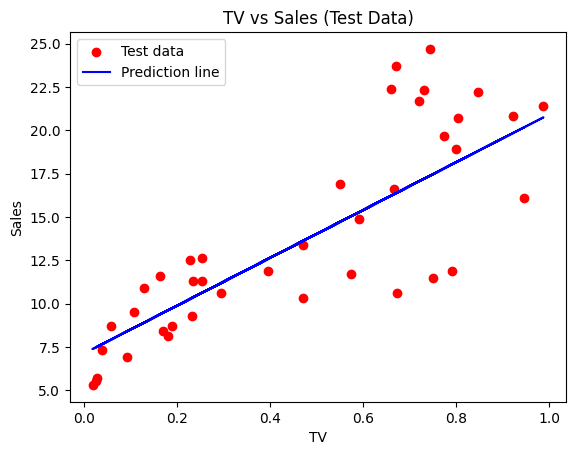

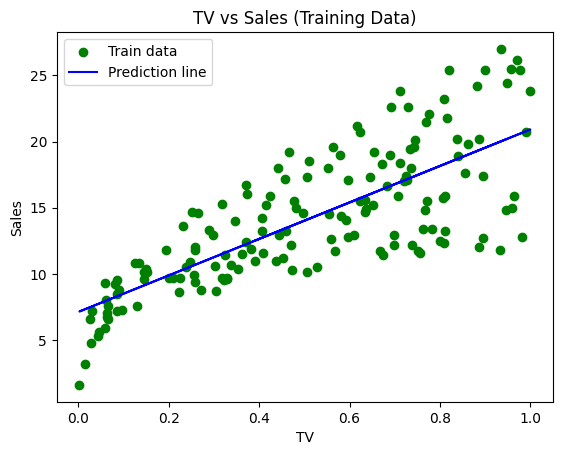

In [53]:
# x_transpose = X.T
# x_inverse = np.linalg.pinv(x_transpose.dot(X))
# x_transpose_y = x_transpose.dot(Y)
# normal_equaction = x_inverse.dot(x_transpose_y)
# plt.scatter(x1, Y)
# plt.plot(x1,X.dot(normal_equaction) , label='Plots the line predicted by the normal equation solution ')
# plt.title("TV vs Sales")
# plt.xlabel("TV")
# plt.ylabel("Sales")
# plt.legend()
# plt.show()

x_transpose = X_train.T
x_inverse = np.linalg.pinv(x_transpose.dot(X_train))
x_transpose_y = x_transpose.dot(Y_train)
normal_equation = x_inverse.dot(x_transpose_y)

Y_pred = X_test.dot(normal_equation)

# Visualization
plt.scatter(X_test[:,1], Y_test, color='red', label='Test data')
plt.plot(X_test[:,1], Y_pred, color='blue', label='Prediction line')
plt.title("TV vs Sales (Test Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# # Optionally, you can also visualize the results on the training data
plt.scatter(X_train[:,1], Y_train, color='green', label='Train data')
plt.plot(X_train[:,1], X_train.dot(normal_equation), color='blue', label='Prediction line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [54]:
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - Y))
    return cost

def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    cost_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        theta = theta - (1/m) * alpha * (X.T.dot(predictions - Y))
        cost_history[i] = compute_cost(X, Y, theta)
        
    return theta, cost_history

In [61]:
alpha = 0.001
num_iters = 100000
theta, cost_history = gradient_descent(X_train, Y_train, theta, alpha, num_iters)

print("Theta (parameters):", theta)
print("Final cost:", cost_history[-1])

Theta (parameters): [ 7.12627237 13.77913578]
Final cost: 135726.2450959855


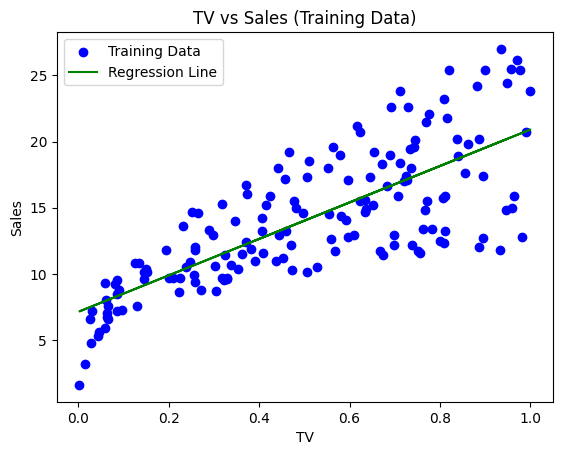

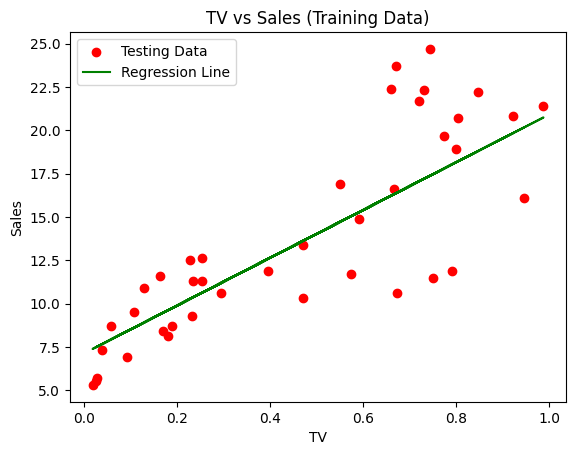

In [62]:
h_theta = X_train.dot(theta) 
h_theta_te = X_test.dot(theta) 

# Plot the training data
plt.scatter(X_train[:, 1], Y_train, color='blue', label='Training Data')
plt.plot(X_train[:,1], h_theta, color='green', label='Regression Line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot the testing data
plt.scatter(X_test[:, 1], Y_test, color='red', label='Testing Data')
plt.plot(X_test[:,1], h_theta_te, color='green', label='Regression Line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()


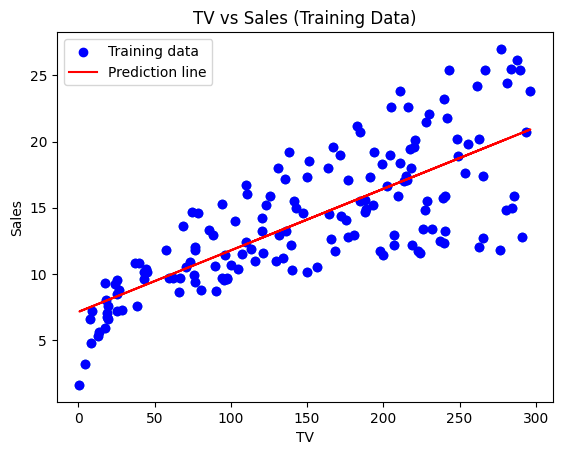

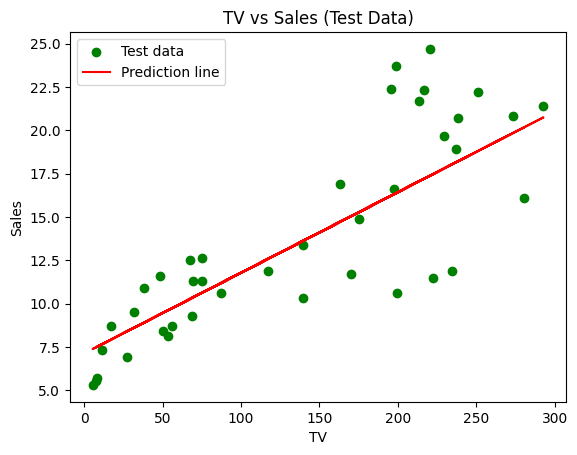

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
plt.scatter(X_train, Y_train)


Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Plotting the results for the training set
plt.scatter(X_train, Y_train, color='blue', label='Training data')
plt.plot(X_train, Y_train_pred, color='red', label='Prediction line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plotting the results for the test set
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.plot(X_test, Y_test_pred, color='red', label='Prediction line')
plt.title("TV vs Sales (Test Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

